
### 📊 Phân tích dữ liệu tín dụng – Biểu đồ trực quan hoá


In [1]:
import kagglehub
import shutil
import os

# Tải về (mặc định vào ~/.cache)
path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")
print("Original path:", path)

# Tạo thư mục mới trong project
new_path = "./data"
shutil.copytree(path, new_path, dirs_exist_ok=True)  # dirs_exist_ok chỉ có từ Python 3.8+

print("Dataset copied to:", new_path)

Original path: C:\Users\Son\.cache\kagglehub\datasets\uciml\default-of-credit-card-clients-dataset\versions\1
Dataset copied to: ./data


In [2]:
# Credit Default Prediction - Sample Notebook

# 1. Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [3]:
# 2. Load data
df = pd.read_csv('data/UCI_Credit_Card.csv')

In [4]:
# 3. Basic info
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
# 4. Rename target for simplicity
df = df.rename(columns={"default.payment.next.month": "default"})


In [6]:
# 5. Check missing values
print(df.isnull().sum())  # No missing in this dataset

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


In [7]:
# 6. Drop ID column (not useful)
df.drop(columns=["ID"], inplace=True)

In [8]:

# 9. Feature/target split
X = df.drop('default', axis=1)
y = df['default']

In [9]:
# 10. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# 11. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 12. Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
# 13. Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.62      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

Confusion Matrix:
[[6607  433]
 [1249  711]]
ROC-AUC Score: 0.7550872927295917


### 🔍 Biểu đồ phân phối biến mục tiêu (vỡ nợ hoặc không)

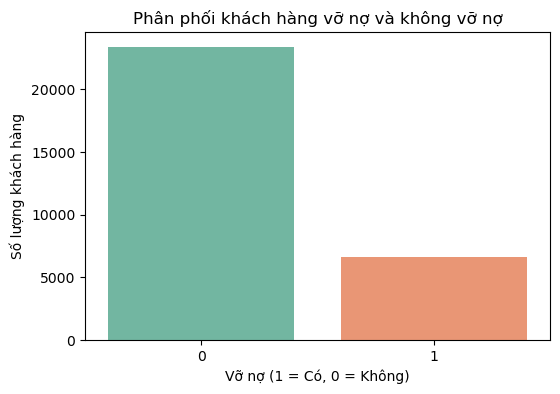

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='default', data=df, palette='Set2')
plt.title('Phân phối khách hàng vỡ nợ và không vỡ nợ')
plt.xlabel('Vỡ nợ (1 = Có, 0 = Không)')
plt.ylabel('Số lượng khách hàng')
plt.show()


### 🧓 Phân phối độ tuổi khách hàng

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


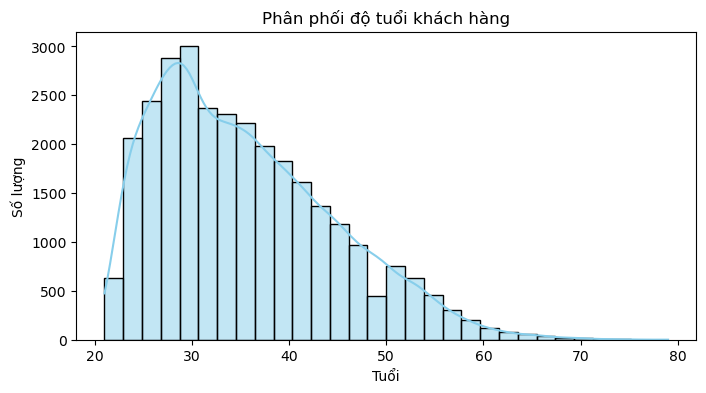

In [13]:

plt.figure(figsize=(8,4))
sns.histplot(df['AGE'], bins=30, kde=True, color='skyblue')
plt.title('Phân phối độ tuổi khách hàng')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.show()


### 💳 Hạn mức tín dụng theo giới tính

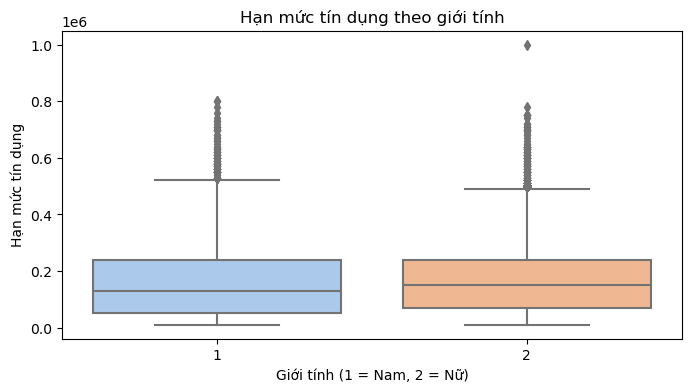

In [14]:

plt.figure(figsize=(8,4))
sns.boxplot(x='SEX', y='LIMIT_BAL', data=df, palette='pastel')
plt.title('Hạn mức tín dụng theo giới tính')
plt.xlabel('Giới tính (1 = Nam, 2 = Nữ)')
plt.ylabel('Hạn mức tín dụng')
plt.show()


### 📈 Mối quan hệ giữa lịch sử thanh toán và khả năng vỡ nợ

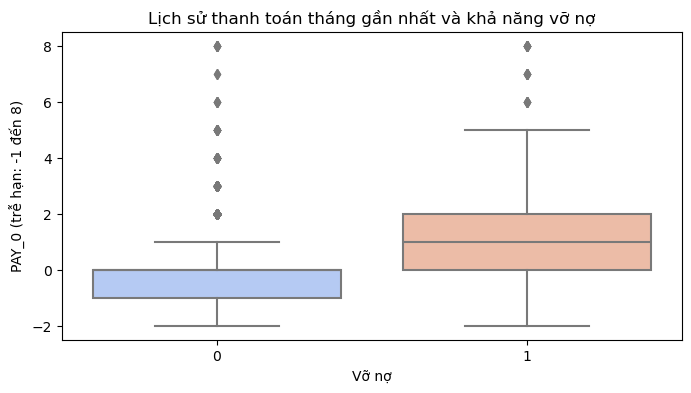

In [15]:

plt.figure(figsize=(8,4))
sns.boxplot(x='default', y='PAY_0', data=df, palette='coolwarm')
plt.title('Lịch sử thanh toán tháng gần nhất và khả năng vỡ nợ')
plt.xlabel('Vỡ nợ')
plt.ylabel('PAY_0 (trễ hạn: -1 đến 8)')
plt.show()


### 🔥 Top các đặc trưng quan trọng nhất từ mô hình

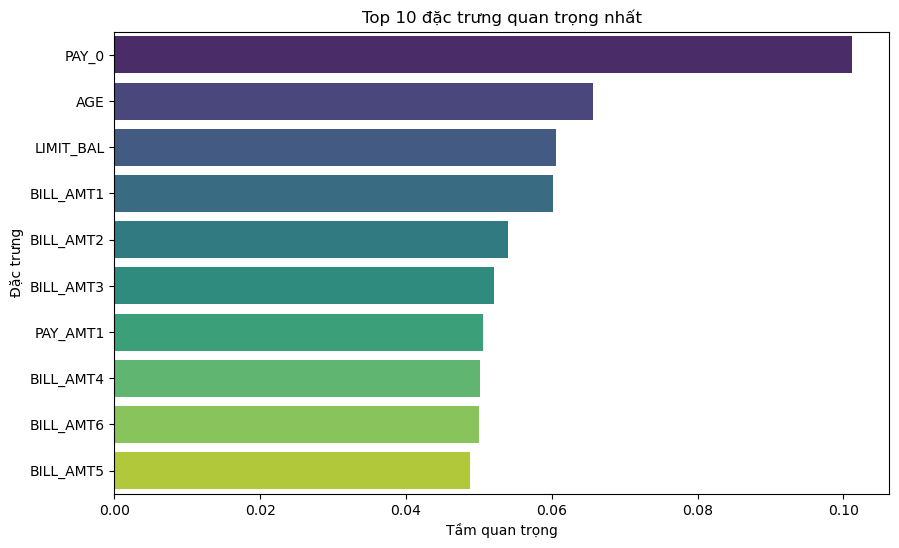

In [16]:

import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=features[indices][:10], palette='viridis')
plt.title('Top 10 đặc trưng quan trọng nhất')
plt.xlabel('Tầm quan trọng')
plt.ylabel('Đặc trưng')
plt.show()
